### Regression and Classification Algorithms

##### 1. Overview

This project explores applications of regression and classification methods in solving real-world problems using machine learning. In the classification method, we apply logistic regression and decision treee algorithm to classify the breast cancer dataset. This dataset provides features computed from digitized images of fine needle aspirates of breast masses. The primary goal is to classify tumors as either malignant or benign based on these features. In the regression method, we apply decision tree regressor and gradient boosting regressor for housing price datasets. These datasets provide valuable insights into the real estate market and can be leveraged for predictive modeling.

Specifically, exploratory data analysis, data preprocessing are performed to draw meaningful insights from the data. Then, model implementation, model evaluation and prediction are finally performed based on the regression and classification algorithms. The project leverages Python libraries such as Pandas for data manipulation, Matplotlib and Seaborn for data visualization, and SciPy for statistical tests. Then sklearn libraries are imported for the implementation and evaluation. 

##### 2. Import Library and Dataset
2.1	Import Libraries or Packages

The first step in the EDA process is to import and install the required packages or libraries. Libraries such as Pandas, NumPy, Seaborn, Matplotlib, SciPy etc. are imported and installed for data manipulation and visualization.

2.2 Import Datasets

Breast cancer datasets and housing price datasets are imported using pd.read_csv.


##### 3. Exploratory Data Analysis (EDA)

3.1	Checking Missing Values

The first step in EDA process involves performing data checks. The first data check to perform is the missing values. The missing values in each column are counted and displayed. Both datasets used in this project display no missing values.

3.2	Checking Duplicates

Again, duplicates are checked to ascertain whether some of the values are duplicated. In the breast cancer dataset, we observe that there are no duplicates. 

3.3	Check Data Types and Unique Values of each Column

The data types and unique values of each column are checked and displayed. 

3.4	Check Statistics of the Dataset

The statistics of the datasets are determined as the mean, standard deviation, and the minimum and maximum values of each numerical variable. 

3.5 Check various categories present in the different categorical column
In breast cancer dataset, the target variable "diagnosis" is the only categorical. However, there is no categorical variable in the housing price dataset.


#### 4. Data Preprocessing

4.1 Split Dataset

Datasets for both algorhtms are split into train and test sets. Breast cancer dataset are split into 80% train set and 20% test set with a random_state of 42 while housing price dataset are set into 70% train set and 30% test set with a random_state of 0.

4.2 Data Standardization

Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison. Standardization is a preprocessing technique used in machine learning to rescale and transform the features (variables) of a dataset to have a mean of 0 and a standard deviation of 1. It is also known as "z-score normalization" or "z-score scaling." All the feaures in both datasets are scaled using are scaled using standard scaler.

4.3	Data Normalization

Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable, so the variable average is 0
scaling the variable so the variance is 1 scaling the variable so the variable values range from 0 to 1. This is done by performing label encoding on the categorical variables. To display the plots, some datasets are normalized.


#### 5. Model Implentation and Evaluation

For classification algorithm, we implement logistic regression LogisticRegression() and Decision tree classifier DecisionTreeClassifier(). For the regresssion algorithm, we implement decision tree regressor and gradient boosting regressor. 


#### 6. Findings
6.1 Results

From the results displayed in the classification algorithm, we can observe that:

•	Logistic regression has the following score an accuracy	of 0.973451 compared to an accuracy of 0.911504 for decision tree classifer. This means that Logistic regression can correctly classified the breast cancer diagnosis by 97% when compared to decision tree classifer.

•	Again, based on the results, logistic refression has a better f1 score, precision and recall when compared with decision tree classifier

From the results displayed in the regression algorithm, we can observe that:

• The decision tree regressor has an R-squared value of 0.76 when compared with gradient boosting regressor with  an R-squared of 0.87. 

• The R-squared value for decision tree regressor was approximately 0.76 indicating a modest fit for the decision tree regression model.

• The model explains nearly 76% of the variance in price based on housing features, as indicated by its high R-squared (R²) value of around 0.68.


#### 7. Conclusion

In summary, logistic regression and decision tree regressors are good models for classification and regression problems

#### References
Logistic Regression From Scratch https://www.kaggle.com/code/fareselmenshawii/logistic-regression-from-scratch#Model-Implementation

Import Libraries

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pprint
import pickle

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import plotly.express as px

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score

Exploratory Data Analysis

In [13]:
df = pd.read_csv('breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
df.shape

(569, 32)

In [7]:
# list the data types for each column
print(df.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [15]:
df.drop('id', axis=1, inplace=True) #drop redundant columns

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Data Visualization

In [18]:
px.histogram(data_frame=df, x='diagnosis', color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [23]:
px.histogram(data_frame=df,x='area_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [24]:
px.histogram(data_frame=df,x='radius_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [25]:
px.histogram(data_frame=df,x='perimeter_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [26]:
px.histogram(data_frame=df,x='smoothness_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [27]:
px.histogram(data_frame=df,x='texture_mean',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

Scatter Plot

In [28]:
px.scatter(data_frame=df,x='symmetry_worst',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [29]:
px.scatter(data_frame=df,x='concavity_worst',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

In [30]:
px.scatter(data_frame=df,x='fractal_dimension_worst',color='diagnosis',color_discrete_sequence=['#05445E','#75E6DA'])

### Data Preprocessing

In [19]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) #encode the label into 1/0

In [20]:
corr = df.corr()

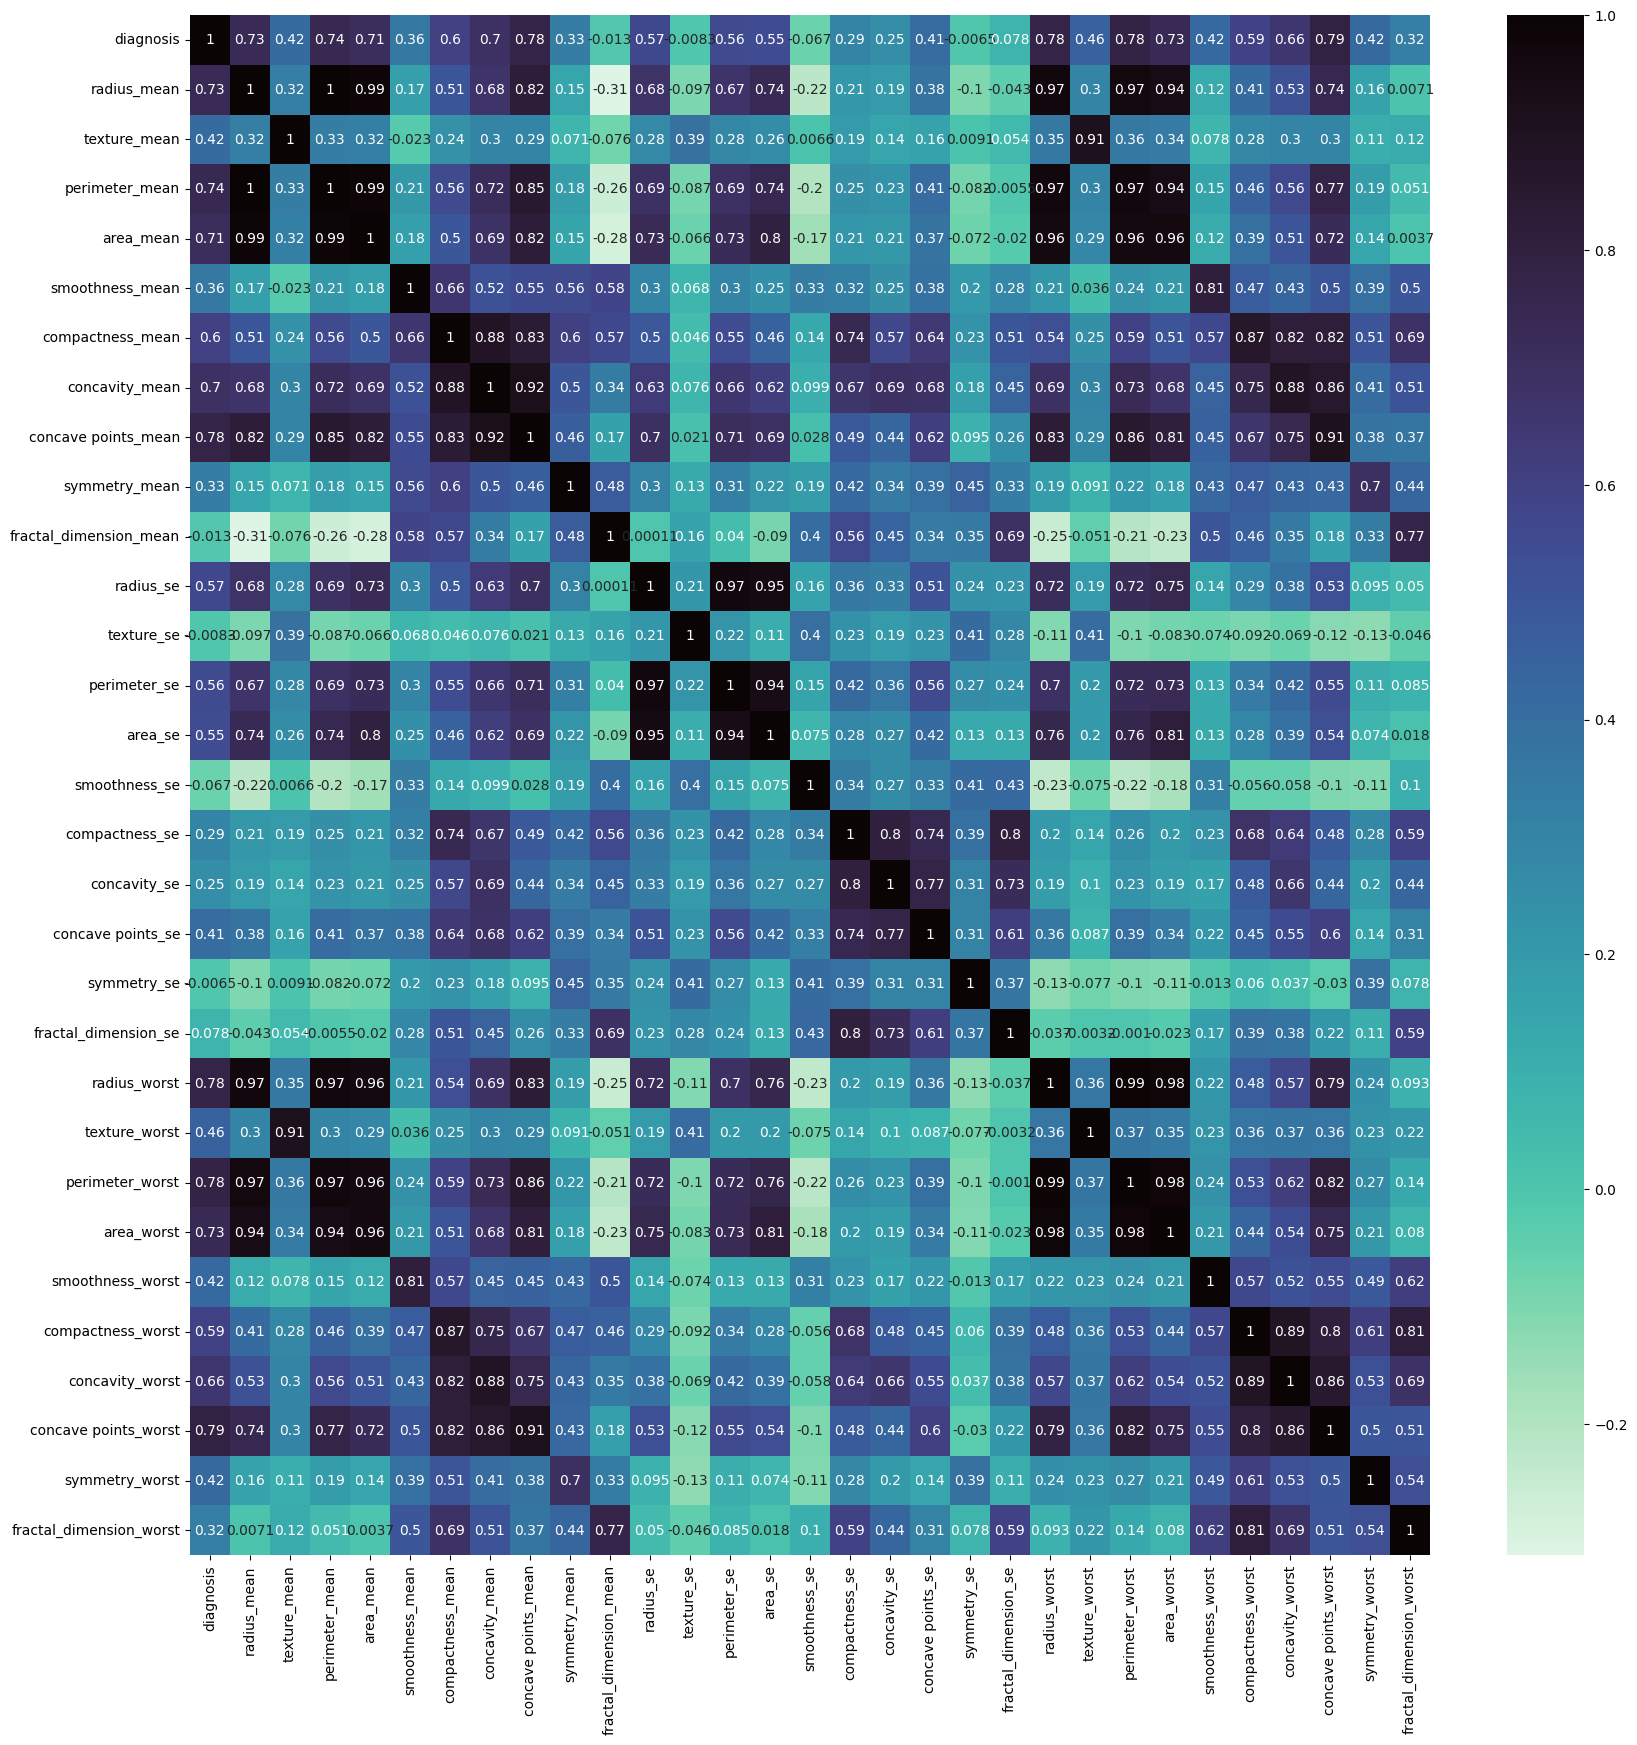

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='mako_r',annot=True)
plt.show()

In [31]:
# Get the absolute value of the correlation
cor_target = abs(corr["diagnosis"])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.items()]

# Drop the target variable from the results
names.remove('diagnosis')

# Display the results
pprint.pprint(names)

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']


Define features and labels

In [32]:
X = df[names].values
y = df['diagnosis'].values

Splitting Dataset

In [33]:
def train_test_split(X, y, random_state=42, test_size=0.2):
    """
    Splits the data into training and testing sets.

    Parameters:
        X (numpy.ndarray): Features array of shape (n_samples, n_features).
        y (numpy.ndarray): Target array of shape (n_samples,).
        random_state (int): Seed for the random number generator. Default is 42.
        test_size (float): Proportion of samples to include in the test set. Default is 0.2.

    Returns:
        Tuple[numpy.ndarray]: A tuple containing X_train, X_test, y_train, y_test.
    """
    # Get number of samples
    n_samples = X.shape[0]

    # Set the seed for the random number generator
    np.random.seed(random_state)

    # Shuffle the indices
    shuffled_indices = np.random.permutation(np.arange(n_samples))

    # Determine the size of the test set
    test_size = int(n_samples * test_size)

    # Split the indices into test and train
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]

    # Split the features and target arrays into test and train
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

Standardize the data

In [35]:
scaler = StandardScaler() #create an instance of standard scaler
scaler.fit(X_train) # fit it to the training data

scaler.transform(X_train) #transform training data
scaler.transform(X_test) #transform validation data

array([[-0.46931968, -0.14236958, -0.44706705, ..., -0.19616923,
         0.17307462,  0.20415955],
       [ 1.35754552,  0.48887662,  1.29836264, ...,  0.99044597,
        -0.56169641, -1.00927924],
       [ 0.37493487,  0.06261074,  0.39916456, ...,  0.56884496,
        -0.10782057, -0.20630957],
       ...,
       [ 0.54717409,  0.10220921,  0.49770682, ...,  0.57804353,
        -0.40458554, -1.12270573],
       [-0.7375611 , -0.99723066, -0.743515  , ..., -0.27926296,
        -0.38236785, -0.32422819],
       [ 0.02480923,  2.01225304,  0.02347222, ..., -0.4922098 ,
        -1.61068918, -0.33152791]])

#### Model Implementation

Model Training

In [36]:
def train_evaluate_model(model, X_train, y_train, X_test,y_test):
    '''
    Keyword arguments:
    X -- Training data
    y -- Traing labels

    returns a dataframe for evaluating metrics
    '''
    
    model.fit(X_train, y_train)  #fit the model instance 


    predictions = model.predict(X_test) # calculate predictions

    #compute metrics for evaluation
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])
    return eval_df

Model Evaluation

1. Logistic Regression Algorithm

In [38]:
lg = LogisticRegression()

results = train_evaluate_model(lg, X_train, y_train, X_test, y_test)

results.index = ['LogisticRegression']

c:\Users\daniel mensah\Desktop\Mach Learning Projects\mlproject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [39]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
LogisticRegression,0.964602,0.951220,0.975000,0.928571,0.957243


2. Decision Tree Algorithm

In [40]:
decision_tree = DecisionTreeClassifier()
decision_tree_results = train_evaluate_model(decision_tree, X_train, y_train, X_test, y_test)
decision_tree_results.index = ['DecisionTree']

In [41]:
decision_tree_results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
DecisionTree,0.911504,0.883721,0.863636,0.904762,0.910127


## Housing Price Prediction using Regression Algorithms

Import Libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix

### Exploratory Data Analysis

1. Data Import

In [67]:
# Import Dataset
df = pd.read_csv('housing_price.csv')
print(df)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242   

In [68]:
df.shape

(21613, 21)

In [69]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
# Import Columns
df = df.drop(['id','date'],axis=1)

2. Data Checks to perform
   
   Check Missing values
   
   Check Duplicates

   Check data type

   Check the number of unique values of each column

   Check statistics of data set
   
   Check various categories present in the different categorical column

2.1 Check Missing values

In [45]:
print(df.isna().sum)

<bound method DataFrame.sum of           id   date  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      False  False  False     False      False        False     False   
1      False  False  False     False      False        False     False   
2      False  False  False     False      False        False     False   
3      False  False  False     False      False        False     False   
4      False  False  False     False      False        False     False   
...      ...    ...    ...       ...        ...          ...       ...   
21608  False  False  False     False      False        False     False   
21609  False  False  False     False      False        False     False   
21610  False  False  False     False      False        False     False   
21611  False  False  False     False      False        False     False   
21612  False  False  False     False      False        False     False   

       floors  waterfront   view  ...  grade  sqft_above  sqft_basement  \
0    

2.2 Check Duplicates

In [46]:
df.duplicated().sum()

0

2.3 Check data type

In [47]:
# list the data types for each column
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


2.4 Check the number of unique values of each column

In [48]:
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

2.5 Check statistics of data set

In [49]:
df.describe().T.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,count,mean,std,min,25%,50%,75%,max
id,21613.000000,4580301520.864988,2876565571.312057,1000102.000000,2123049194.000000,3904930410.000000,7308900445.000000,9900000190.000000
price,21613.000000,540088.141767,367127.196483,75000.000000,321950.000000,450000.000000,645000.000000,7700000.000000
bedrooms,21613.000000,3.370842,0.930062,0.000000,3.000000,3.000000,4.000000,33.000000
bathrooms,21613.000000,2.114757,0.770163,0.000000,1.750000,2.250000,2.500000,8.000000
sqft_living,21613.000000,2079.899736,918.440897,290.000000,1427.000000,1910.000000,2550.000000,13540.000000
sqft_lot,21613.000000,15106.967566,41420.511515,520.000000,5040.000000,7618.000000,10688.000000,1651359.000000
floors,21613.000000,1.494309,0.539989,1.000000,1.000000,1.500000,2.000000,3.500000
waterfront,21613.000000,0.007542,0.086517,0.000000,0.000000,0.000000,0.000000,1.000000
view,21613.000000,0.234303,0.766318,0.000000,0.000000,0.000000,0.000000,4.000000
condition,21613.000000,3.409430,0.650743,1.000000,3.000000,3.000000,4.000000,5.000000


2.6 Check various categories present in the different categorical column

In [50]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 20 numerical features : ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

We have 1 categorical features : ['date']


3. Data Visualization

Pair Plot

<Figure size 1000x600 with 0 Axes>

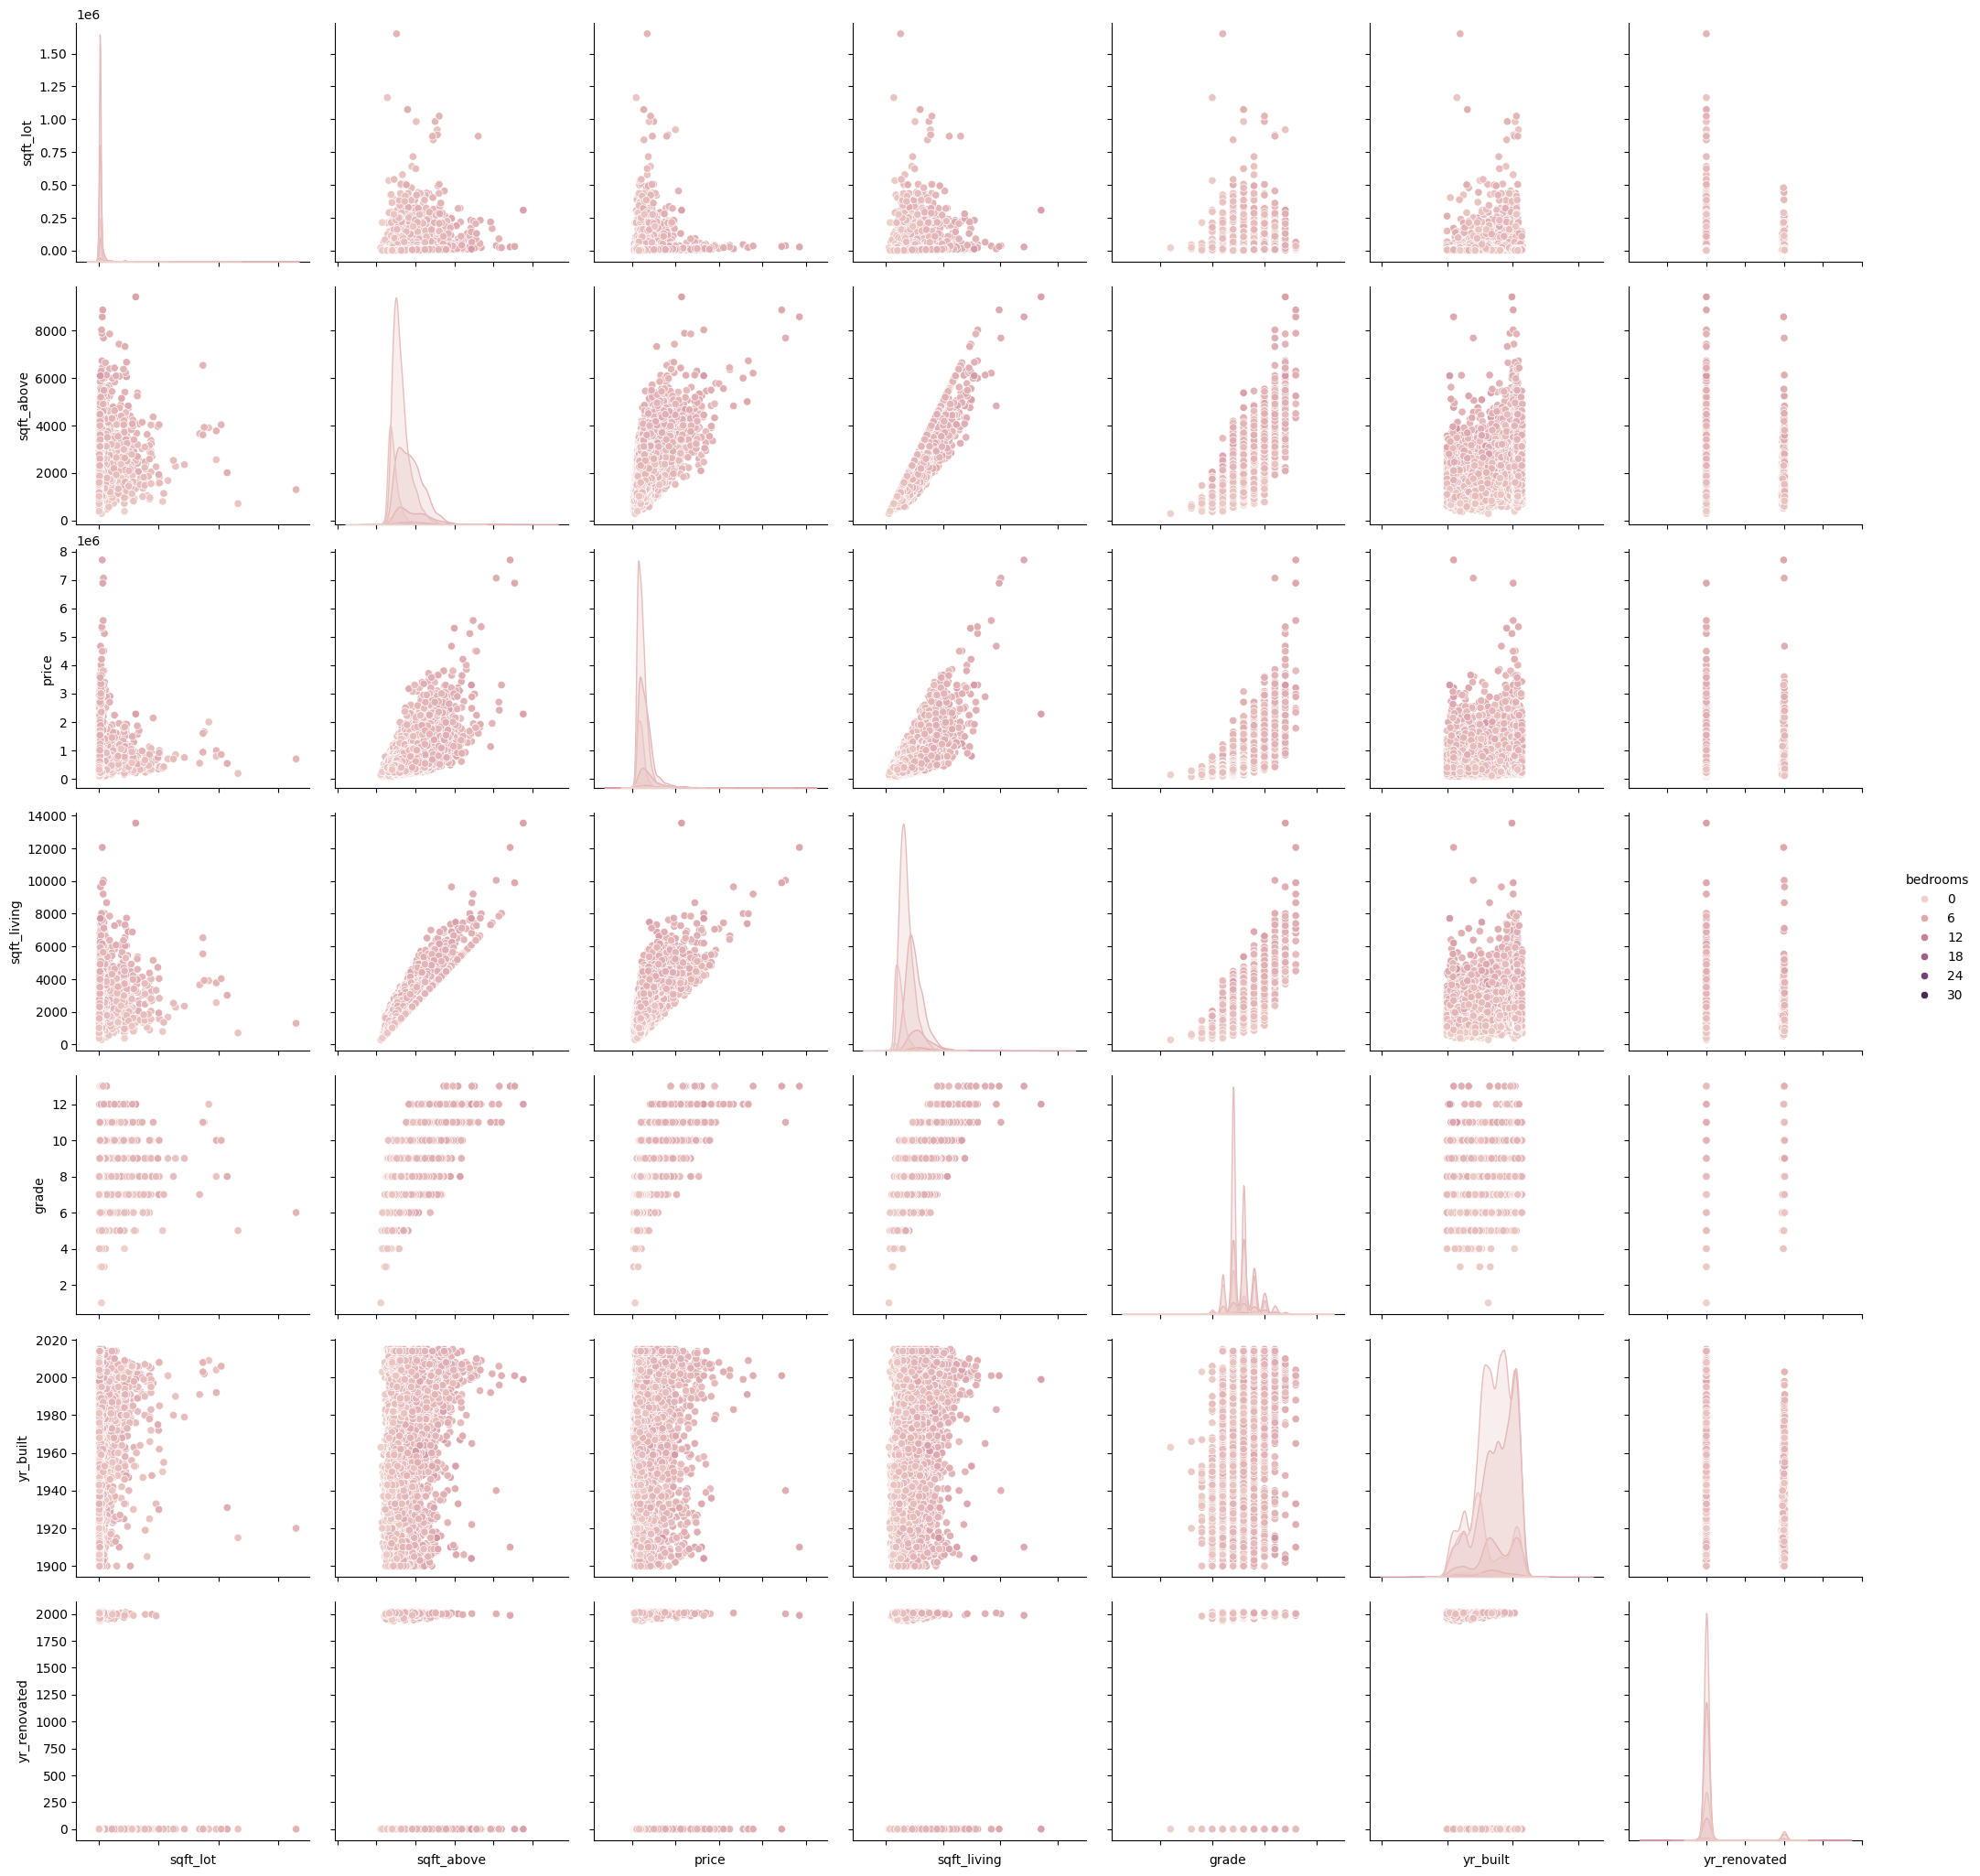

In [53]:
plt.figure(figsize=(10,6))
sns.plotting_context('notebook',font_scale=1.5)
g = sns.pairplot(df[['sqft_lot','sqft_above','price','sqft_living','bedrooms','grade','yr_built','yr_renovated']]
                 ,hue='bedrooms',height=3)
g.set(xticklabels=[])

Joint Plot

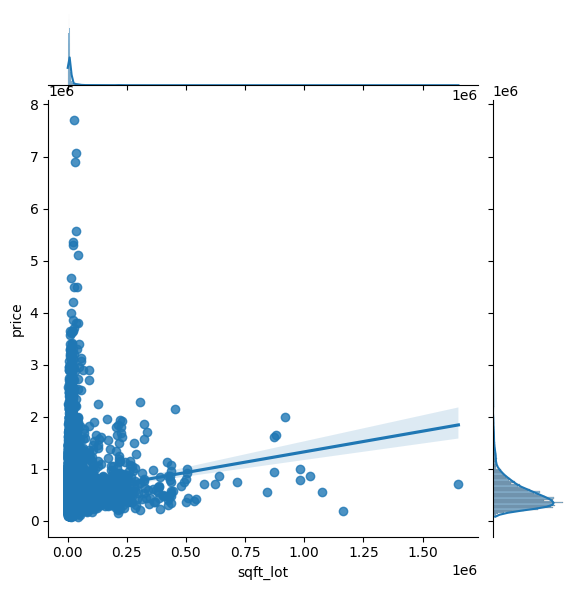

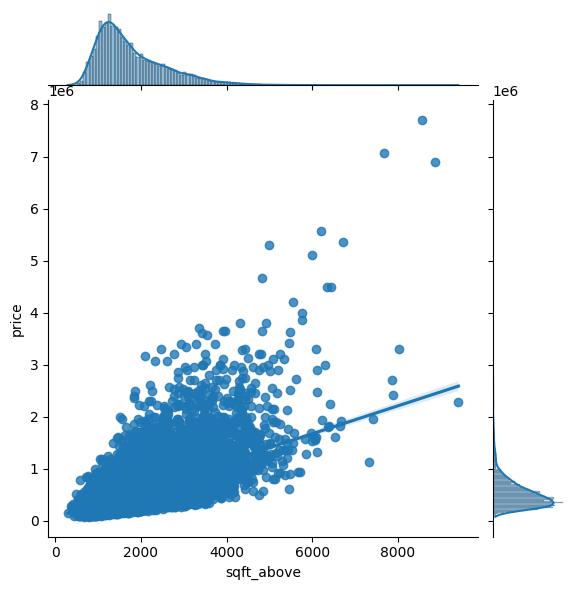

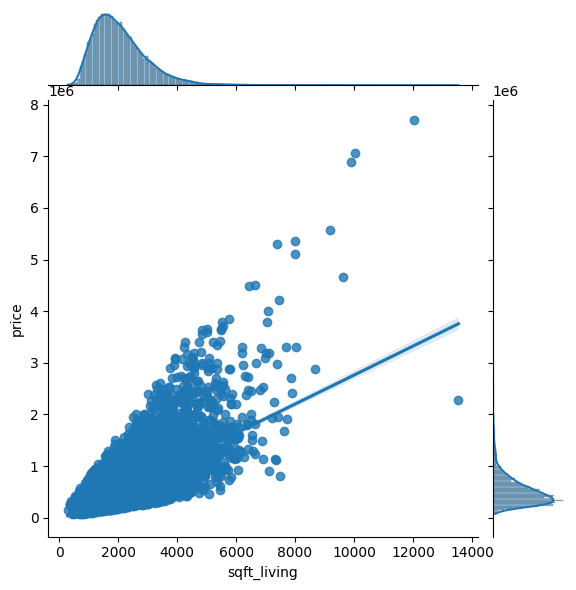

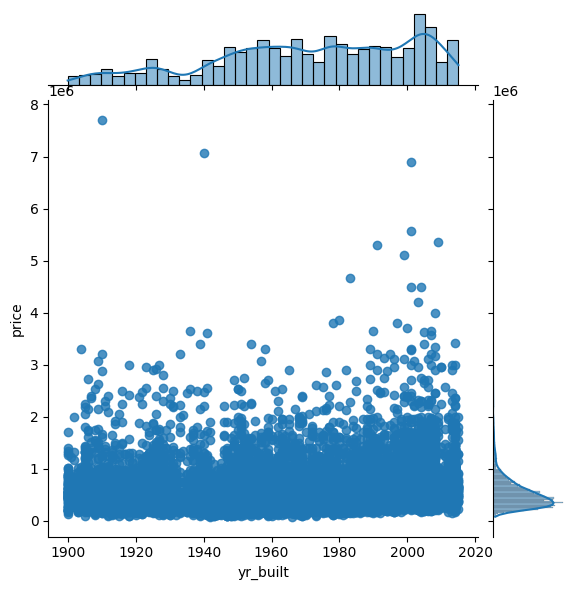

In [54]:
sns.jointplot(x='sqft_lot',y='price',data=df,kind='reg',marker='o')
sns.jointplot(x='sqft_above',y='price',data=df,kind='reg',marker='o')
sns.jointplot(x='sqft_living',y='price',data=df,kind='reg',marker='o')
sns.jointplot(x='yr_built',y='price',data=df,kind='reg',marker='o')

Scatter Plot

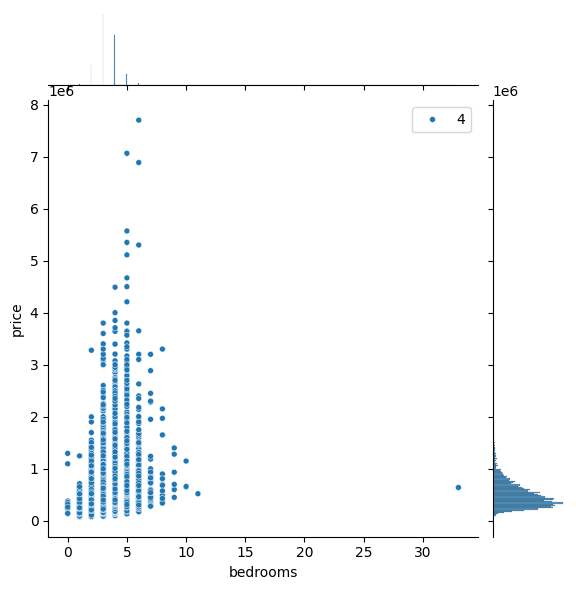

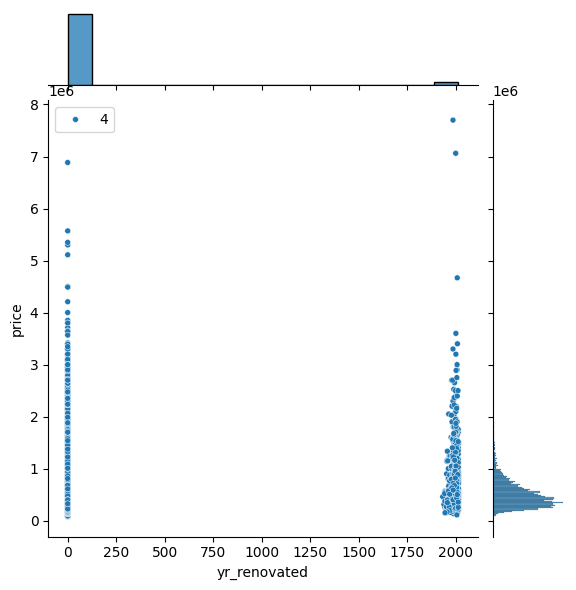

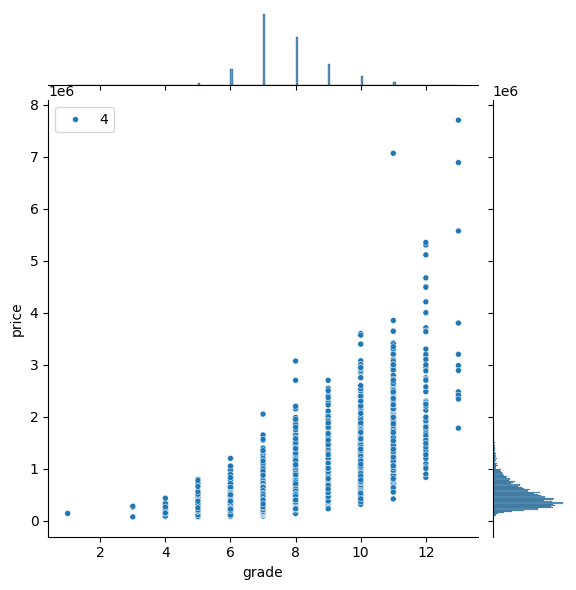

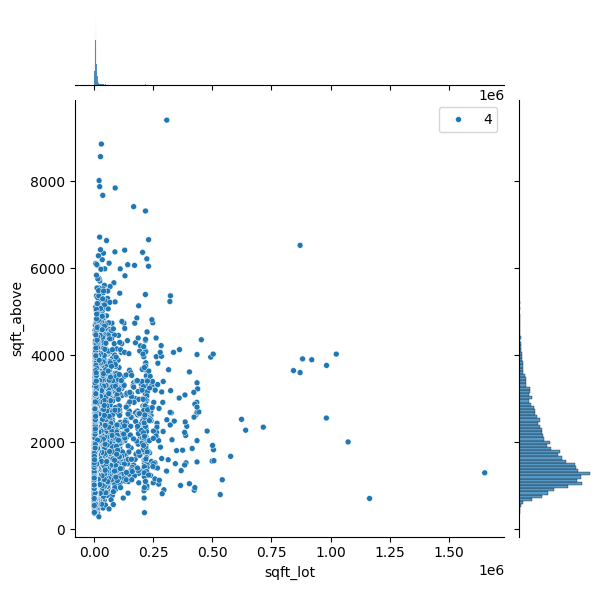

In [55]:
sns.jointplot(x='bedrooms',y='price',data=df,kind='scatter',size=4)
sns.jointplot(x='yr_renovated',y='price',data=df,kind='scatter',size=4)
sns.jointplot(x='grade',y='price',data=df,kind='scatter',size=4)
sns.jointplot(x='sqft_lot',y='sqft_above',data=df,kind='scatter',size=4)

### Data Preprocessing

Correlation between Variables

Use heatmap to view the co relation between variables

<Axes: >

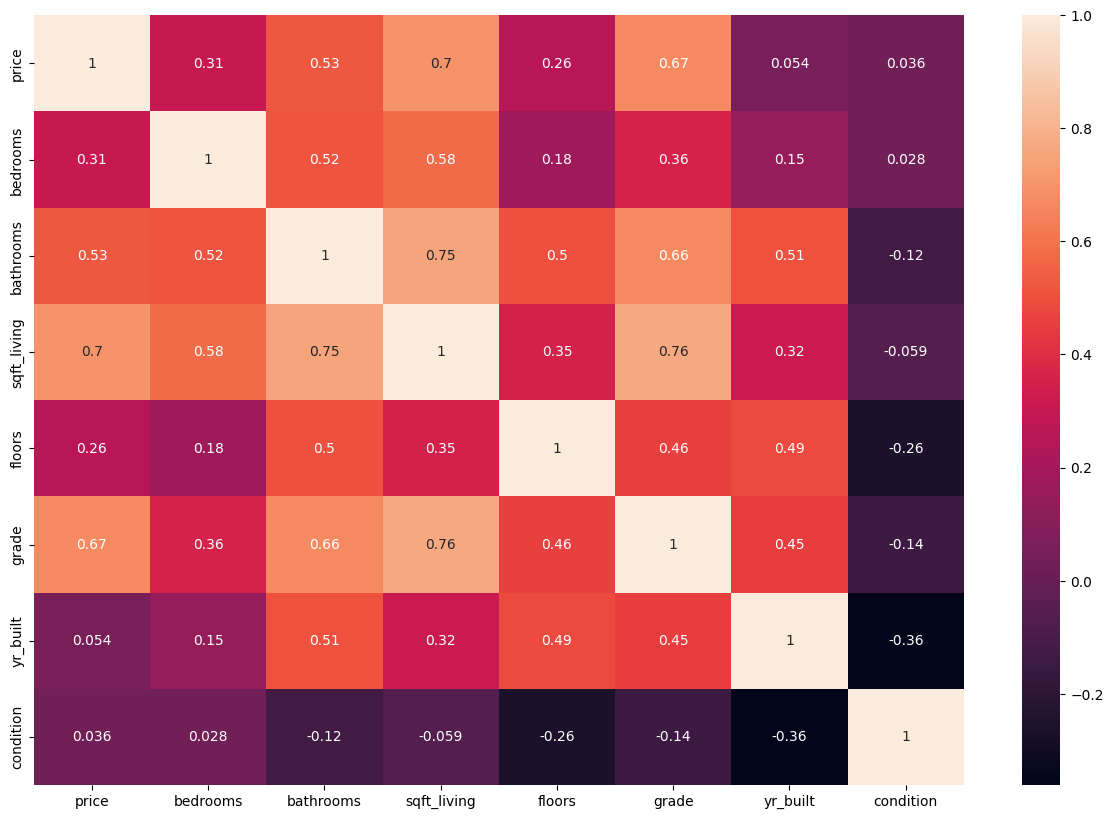

In [56]:
plt.figure(figsize=(15,10))
columns =['price','bedrooms','bathrooms','sqft_living','floors','grade','yr_built','condition']
sns.heatmap(df[columns].corr(),annot=True)

Define Data and Labels

In [74]:
# X(Independent variables) and y(target variables) 
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [75]:
#Splitting the data into train,test data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [76]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Implementation

##### Model Training, Evaluation and Prediction

1. Linear Regression

In [78]:
from sklearn.metrics import mean_squared_error

In [79]:
# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)  # Train the model

LinearRegression()

In [80]:
# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"MSE: {mse:.2f}")

Mean Absolute Error: 124034.76
R-squared: 0.69
MSE: 42863880415.46


2. Decision Tree Regressor

In [81]:
# Create a decision tree regressor model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)  # Train the model

DecisionTreeRegressor()

In [82]:
# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"MSE: {mse:.2f}")

Mean Absolute Error: 99400.31
R-squared: 0.74
MSE: 35527091476.51


3. Gradient Boosting Regressor

In [83]:
from sklearn.ensemble import GradientBoostingRegressor
# Create a gradient boosting regressor model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=101)
model.fit(X_train, y_train)  # Train the model

GradientBoostingRegressor(random_state=101)

In [84]:
# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"MSE: {mse:.2f}")

Mean Absolute Error: 76588.76
R-squared: 0.87
MSE: 17780300131.84
